# Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

# Importando os dados
<br>
A base de dados foi escolhido no Kaggle no seguinte link <br>
(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

In [2]:
df = pd.read_csv('creditcard.csv')

## Verificando os dados

Verificando se há dados faltantes

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


O dataset foi tratado com um metodo de redução de dimensionalidade e alterou o nome da coluna para proteger os dados dos clientes

In [4]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Aqui estou inspecionando para ver o balanceamento dos dados

In [5]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Como podemos ver ela é extremamente desbalanceada. É necessário alguma tecnica de imblearn. Alguns metodos são:Gerar dados sinteticos, Oversampling ou undersampling para assim aumentar ou diminuir frequência de uma classe nesse notebook optei por oversampling com geração de dados sinteticos. Eu usei a função SMOTE que gera um oversampling com dados sinteticos.

In [6]:
ys = df.Class.value_counts().loc[1] / df.Class.value_counts().sum()

In [7]:
ys

0.001727485630620034

# Preparando os dados para o oversampling

In [8]:
X = df.drop(columns = 'Class')
y = df.Class

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = df.Class)

Aqui importo a biblioteca imblearn e busco a função SMOTE

In [9]:
from imblearn.over_sampling import SMOTE

A função SMOTE deve ser aplicada apenas na parte de treinamento dos dados para treinar o modelo o que é uma fraude ou não

In [10]:
X_train_over, y_train_over = SMOTE().fit_resample(X_train, y_train)

Aqui import o modelo que desejo. Eu usei o RandomForestClassifier ao enves do modelo XGBoostClassifier por um motivo ele é mais simples que o XGBoost e isso gera menos overfit. Como há poucos é possivel que ocorra um underfit ou overfit no XGBoost

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
from sklearn.metrics import f1_score

Usei o f1_score pois ele é a média harmonica da precisão e recall assim tendo uma noção do balanceamento das métricas. Nesse projeto é mais importante que o recall seja alto para evitar falsos negativos. Quanto maior o recall mais fraudes são detectadas corretamente e menos falsos negativos ocorrem

In [13]:
modelo = RandomForestClassifier()
modelo.fit(X_train_over, y_train_over)
pred = modelo.predict(X_val)
pred_proba = modelo.predict_proba(X_val)[:,1]
f1 = f1_score(y_val, pred)
f1

0.875

In [14]:
from sklearn.metrics import recall_score

Aqui podemos ver que o modelo tem um recall de 82,11% o que torna muito superior a baseline de apenas chutar que não há nenhuma fraude

In [15]:
resultado = recall_score(y_val, pred)
print(f'{resultado * 100:.2f}')

85.37


# ROC e AUC score

In [16]:
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

Aqui é usado o roc para visualizar qual é a melhor opção para o modelo. Nesse caso Quanto menor os falsos positivos melhor. Um falso positivo irá bloquear uma fraude de ocorrer.

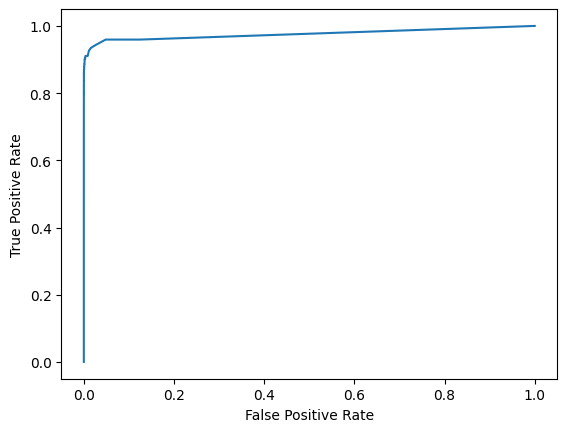

In [17]:
fpr, tpr, _ = roc_curve(y_val, pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Podemos ver no gráfico que os verdadeiros positivos chegam bem alto quando se inicia um aumento nos falsos positivos. Mas nesse caso é importante minimizar falsos positivos

In [18]:
from sklearn.metrics import roc_auc_score

In [19]:
roc_auc_score(y_val, pred_proba)

0.9760037983615392

In [20]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 20, num = 20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)]
min_samples_split = [2, 6, 10]
min_samples_leaf = [1, 3, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               
'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
rf_random = RandomizedSearchCV(estimator = modelo, param_distributions = random_grid, n_iter = 100, cv =5, verbose = 2,
                              random_state = 42, n_jobs = -1)

rf_random.fit(X_train_over, y_train_over)
pred = rf_random.predict(X_val, y_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/matheus/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also t

TypeError: BaseSearchCV.predict() takes 2 positional arguments but 3 were given

[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=6; total time=  36.5s
[CV] END bootstrap=True, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5; total time=  20.1s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time= 1.1min
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=3; total time=  17.1s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  41.1s
[CV] END bootstrap=False, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=8; total time=  47.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=  16.9s
[CV] END bootstrap=False, max_depth=20, max_features

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=3; total time=   8.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=3; total time=   8.1s
[CV] END bootstrap=True, max_depth=120, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=5; total time=  19.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=  50.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time= 1.1min
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10; total time=  41.2s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time= 1.2min
[CV] END bootstrap=True, max_depth=40, max_features=

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=  43.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=13; total time= 1.3min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=18; total time= 1.8min
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=  16.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=  55.8s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=3; total time=  18.9s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=7; total time=  40.0s
[CV] END bootstrap=True, max_depth=30, max_featur

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=  38.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=  51.7s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=18; total time= 1.7min
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time= 1.1min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=8; total time=  45.8s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=9; total time=  50.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=16; total time= 1.0min
[CV] END bootstrap=True, max_depth=120, max_featur

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=  40.1s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=13; total time= 1.3min
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=18; total time= 1.8min
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=  54.1s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=7; total time=  26.6s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=15; total time= 1.4min
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=3, min_samples_split=10, n_estimators=3; total time=  18.1s
[CV] END bootstrap=True, max_depth=120, max_fe

[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=11; total time=  39.3s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=19; total time=  50.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=17; total time= 1.1min
[CV] END bootstrap=False, max_depth=120, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=8; total time=  45.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=  15.9s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=4; total time=  15.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=10; total time=  57.0s
[CV] END bootstrap=False, max_depth=40, max_features=a

Mesmo com um leve ajuste dos hiperparametros não houve um ganho substancial no f1_score e nem no recall

In [23]:
f1_score(y_val, pred)

0.875

In [24]:
recall_score(y_val, pred)

0.8536585365853658

# Conclusão

Com um método básico de imblearn temos um aumento substancial na nosa baseline. Considerando que ela era chutar que não há fraudes, com essa baseline temos uma precisão de 99,87% de precisão e 0% de recall tendo um f1 score de 0 por ter um recall de 0%. Com um tratamento adequado dos dados tem um ganho alto de f1 score e recall em 84,38% no f1 score e no recall de 81,30%. Com um ajuste de hiperparametros com gridsearch poderia ter resultados bem melhores ou até mesmo usando o XGBoost. Mas optei por simplicidade para não ocorrer overfit nem underfit